<font color='Green' size='5'><b> ***🚜👨‍🌾🌾 Plant Disease Detection  🚜👨‍🌾🌾*** </b></font>


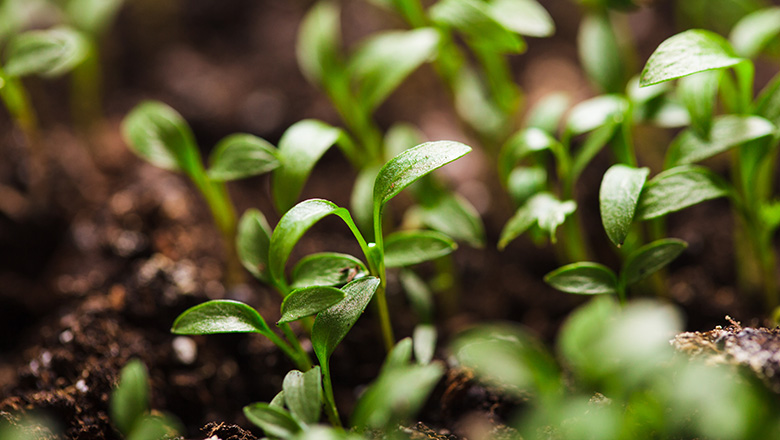

Identification of the plant diseases is the key to preventing the losses in the yield and quantity of the agricultural product. The studies of the plant diseases mean the studies of visually observable patterns seen on the plant. Health monitoring and disease detection on plant is very critical for sustainable agriculture.

It is very difficult to monitor the plant diseases manually. It requires tremendous amount of work, expertize in the plant diseases, and also require the excessive processing time. Hence, image processing is used for the detection of plant diseases.

Disease detection involves the steps like image acquisition, image pre-processing, image segmentation, feature extraction and classification.

<div style="text-align: center;">
  <h2 style="color: green;">Step 1: Import All the Necessary Libraries</h2>
</div>

In [2]:
import cv2               as cv
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import urllib
import random
import os
import glob
import shutil
#import visualkeras
from imutils               import paths
from sklearn.utils         import shuffle
from urllib.request        import urlopen
from sklearn.decomposition import PCA
from IPython.display       import Image
from tqdm                  import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import cv2
import numpy as np
from PIL import Image


import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models              import Sequential, load_model
from tensorflow.keras.preprocessing       import image
from tensorflow.keras.utils               import to_categorical, plot_model
from tensorflow.keras.callbacks           import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers              import Conv2D,Flatten,MaxPooling2D,Dense,Dropout,SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img,array_to_img
from keras.layers                         import BatchNormalization, GlobalAveragePooling2D


import tensorflow as tf
from tensorflow.keras.applications import InceptionV3  # Pretrained InceptionV3 model
from tensorflow.keras.models import Model  # To define the model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D  # Custom layers
from tensorflow.keras.optimizers import Adam  # Optimizer for training
from IPython.display       import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os

# Vérifiez si le dossier existe
directory = '/content/drive/MyDrive/PlantVillage'
if os.path.isdir(directory):
    print("Le dossier existe !")
else:
    print("Le dossier n'existe pas.")

Le dossier existe !


<div style="text-align: center;">
  <h2 style="color: #D35400;">Step 2: Import Data and Apply Data Preprocessing</h2>
</div>



In [5]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from PIL import UnidentifiedImageError  # Importer l'exception pour gérer les erreurs d'image

# Chemin du dataset
data_dir = '/content/drive/MyDrive/PlantVillage'

# Vérifier si le dossier contient un sous-dossier unique "PlantVillage"
subdirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
if len(subdirs) == 1 and subdirs[0] == "PlantVillage":
    data_dir = os.path.join(data_dir, "PlantVillage")  # Corrige le chemin

print(f"Utilisation du dossier : {data_dir}")

# Définir la taille des images
img_size = (128, 128)

# Récupérer toutes les classes (dossiers uniquement)
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
classes.sort()
print(f"Classes trouvées : {classes}")

# Mapper les classes en indices numériques
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(classes)
label_mapping = dict(zip(classes, encoded_labels))
print(f"Mapping des classes : {label_mapping}")

# Fonction pour charger les images et leurs labels
def load_data_from_directory(directory, target_size=(128, 128), label_mapping=None):
    images = []
    labels = []

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if not os.path.isdir(class_path):  # Vérifier si c'est un dossier
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            # Vérifier que c'est un fichier image valide
            if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                print(f"Fichier ignoré (non image) : {img_path}")
                continue

            try:
                img = load_img(img_path, target_size=target_size)  # Charger l'image
                img_array = img_to_array(img) / 255.0  # Normaliser entre 0 et 1
                images.append(img_array)
                labels.append(label_mapping[class_name])  # Associer l’image à son label
            except UnidentifiedImageError:
                print(f"⚠️ Erreur : Impossible de charger {img_path} (image corrompue ou invalide)")

    return np.array(images), np.array(labels)

# Charger les données
x_data, y_data = load_data_from_directory(data_dir, target_size=img_size, label_mapping=label_mapping)

print(f"Shape des images : {x_data.shape}")
print(f"Shape des labels : {y_data.shape}")


Utilisation du dossier : /content/drive/MyDrive/PlantVillage/PlantVillage
Classes trouvées : ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Mapping des classes : {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'PlantVillage': 2, 'Potato___Early_blight': 3, 'Potato___Late_blight': 4, 'Potato___healthy': 5, 'Tomato_Bacterial_spot': 6, 'Tomato_Early_blight': 7, 'Tomato_Late_blight': 8, 'Tomato_Leaf_Mold': 9, 'Tomato_Septoria_leaf_spot': 10, 'Tomato_Spider_mites_Two_spotted_spider_mite': 11, 'Tomato__Target_Spot': 12, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 13, 'Tomato__Tomato_mosaic_virus': 14, 'Toma

✅ Dossier trouvé : /content/drive/MyDrive/PlantVillage/PlantVillage


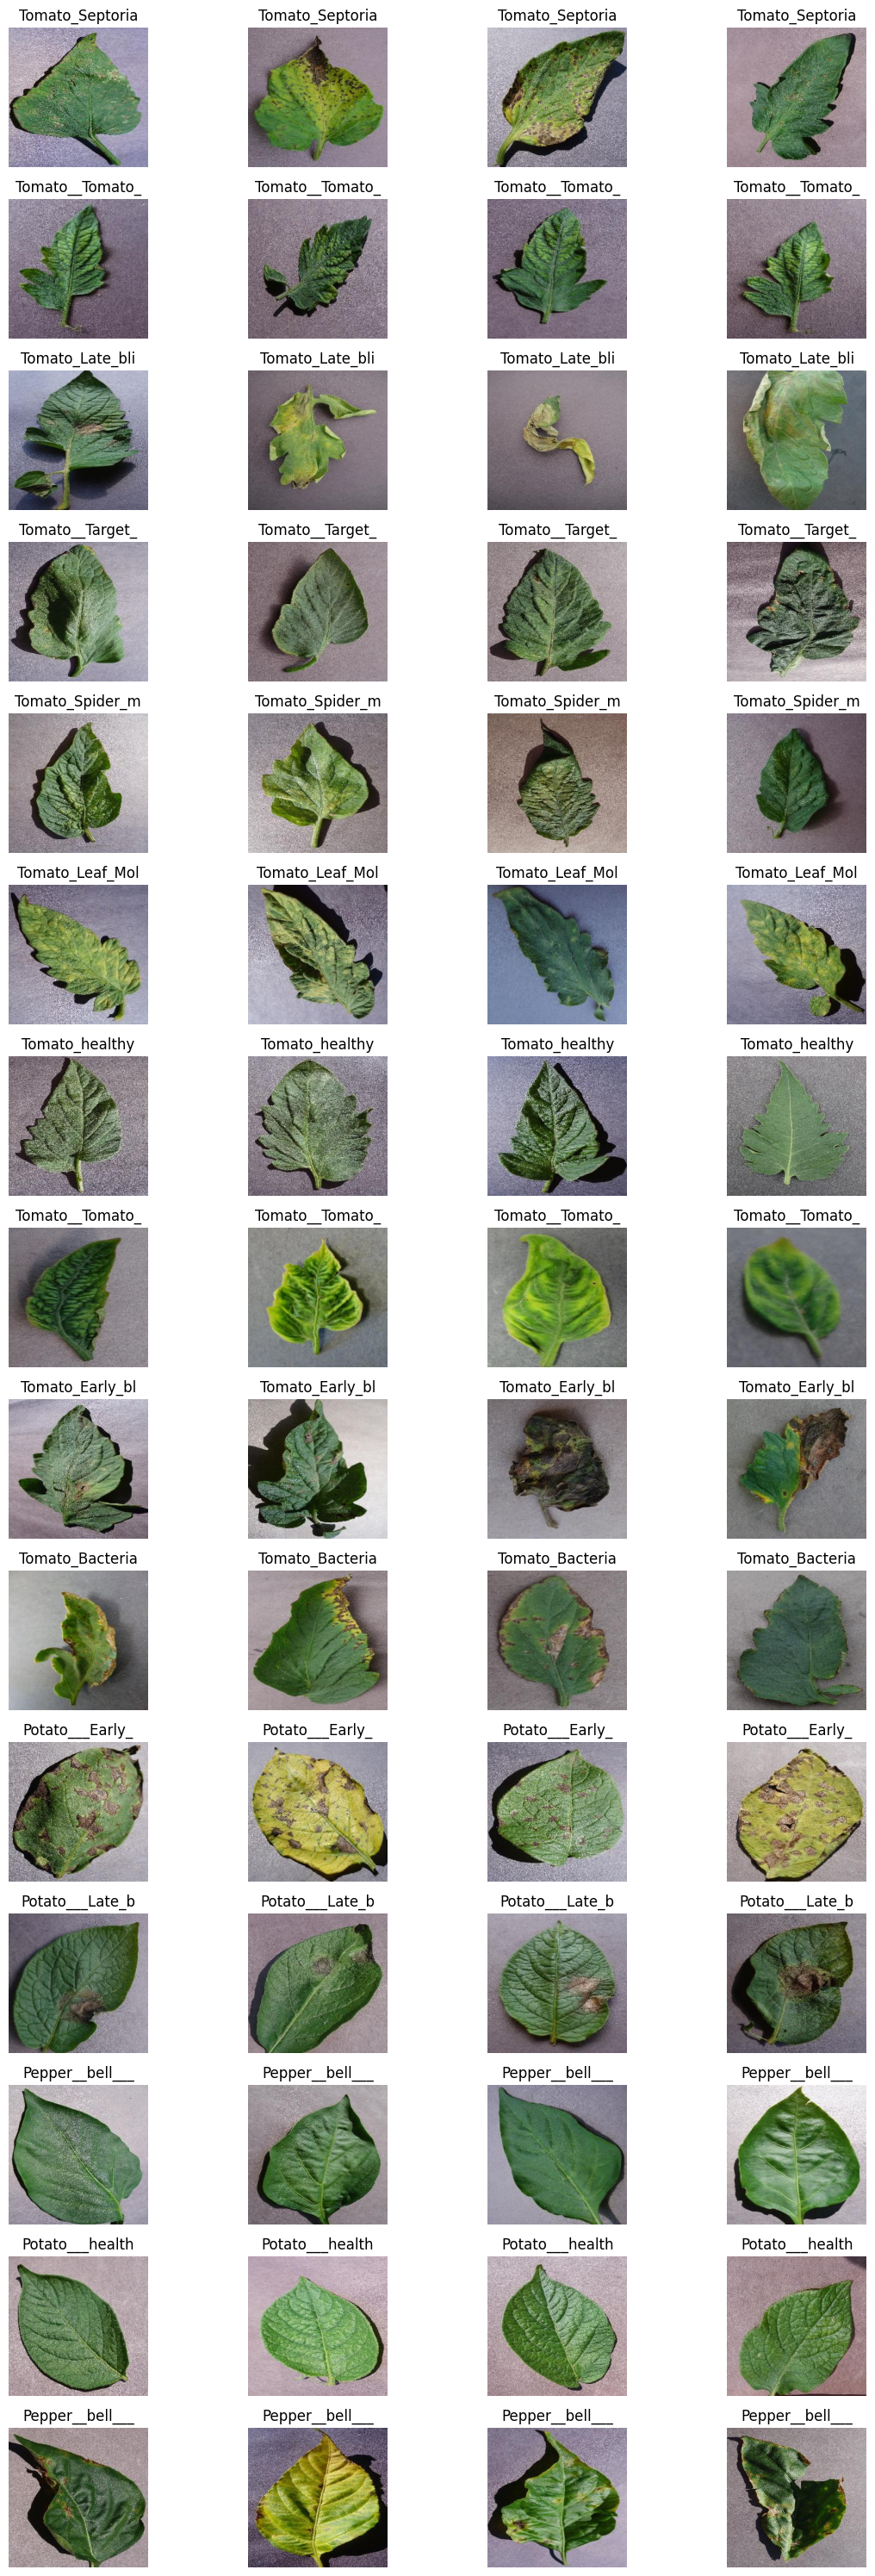

In [10]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Définir le répertoire des données
data_dir = '/content/drive/MyDrive/PlantVillage'
plant_village_path = os.path.join(data_dir, "PlantVillage")

# Vérifier si le répertoire existe
if not os.path.exists(plant_village_path):
    print("⚠️ Le dossier 'PlantVillage' n'existe pas.")
else:
    print("✅ Dossier trouvé :", plant_village_path)

# Fonction pour afficher des images de catégories spécifiques
def plot_specific_classes(data_dir, target_classes, num_samples=4):
    plant_village_path = os.path.join(data_dir, "PlantVillage")

    # Vérifier si le dossier existe
    if not os.path.exists(plant_village_path):
        print("⚠️ Le dossier 'PlantVillage' n'existe pas.")
        return

    # Lister les classes correspondant aux mots-clés
    classes = [cls for cls in os.listdir(plant_village_path) if os.path.isdir(os.path.join(plant_village_path, cls))]
    selected_classes = [cls for cls in classes if any(keyword.lower() in cls.lower() for keyword in target_classes)]

    if not selected_classes:
        print("⚠️ Aucune classe trouvée correspondant aux critères :", target_classes)
        return

    plt.figure(figsize=(12, len(selected_classes) * 2))

    for i, cls in enumerate(selected_classes):
        class_path = os.path.join(plant_village_path, cls)

        # Filtrer les images valides
        valid_extensions = (".jpg", ".jpeg", ".png")
        images = [img for img in os.listdir(class_path) if img.lower().endswith(valid_extensions)]

        if not images:
            print(f"⚠️ Aucune image trouvée pour la classe '{cls}'.")
            continue

        # Sélectionner un nombre défini d'images
        selected_images = random.sample(images, min(num_samples, len(images)))

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(class_path, img_name)

            if not os.path.exists(img_path):
                print(f"❌ Fichier introuvable : {img_path}")
                continue

            img = cv2.imread(img_path)

            if img is None:
                print(f"❌ Impossible de charger l'image : {img_path}")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Affichage
            plt.subplot(len(selected_classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(cls[:15])

    plt.tight_layout()
    plt.show()

# Classes spécifiques à afficher
target_classes = ["Healthy", "Tomato", "Potato", "Pepper"]

# Afficher les images
plot_specific_classes(data_dir, target_classes)




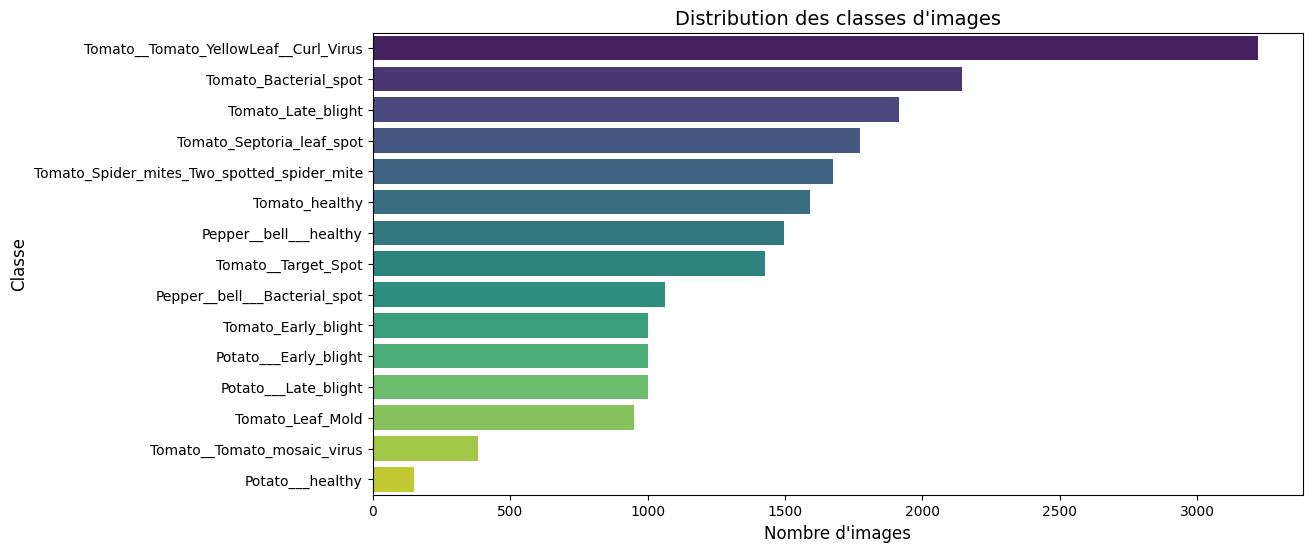

In [11]:
# Créer un DataFrame avec les labels
df = pd.DataFrame({'label': [list(label_mapping.keys())[list(label_mapping.values()).index(y)] for y in y_data]})

# Afficher la distribution des labels avec Seaborn
plt.figure(figsize=(12, 6))  # Ajuster la taille du graphique
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette="viridis")

# Ajouter des titres et labels
plt.title("Distribution des classes d'images", fontsize=14)
plt.xlabel("Nombre d'images", fontsize=12)
plt.ylabel("Classe", fontsize=12)

plt.show()

In [12]:
pip install rich


In [13]:
import os
from rich.console import Console
from rich.table import Table

# Initialiser la console Rich
console = Console()

# Définir le répertoire principal des données
data_dir = '/content/drive/MyDrive/PlantVillage'

# Définir les chemins possibles (différentes casses)
possible_dirs = ["PlantVillage", "plantvillage"]

# Vérifier quel répertoire existe et récupérer son contenu
found_dirs = {}
for dir_name in possible_dirs:
    dir_path = os.path.join(data_dir, dir_name)

    if os.path.exists(dir_path) and os.path.isdir(dir_path):
        # Récupérer uniquement les sous-dossiers (évite les fichiers)
        classes = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
        found_dirs[dir_name] = sorted(classes)  # Trier les classes alphabétiquement

# Affichage avec Rich
if found_dirs:
    for name, classes in found_dirs.items():
        table = Table(title=f"📁 Classes trouvées dans '{name}'", title_style="bold cyan")

        table.add_column("Index", style="bold magenta", justify="center")
        table.add_column("Nom de la Classe", style="bold yellow")

        for i, class_name in enumerate(classes, start=1):
            table.add_row(str(i), class_name)

        console.print(table)

else:
    console.print("[bold red]⚠️ Aucun dossier 'PlantVillage' ou 'plantvillage' trouvé ![/bold red]")



        📁 Classes trouvées dans 'PlantVillage'        
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Nom de la Classe                            ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│   1   │ Pepper__bell___Bacterial_spot               │
│   2   │ Pepper__bell___healthy                      │
│   3   │ PlantVillage                                │
│   4   │ Potato___Early_blight                       │
│   5   │ Potato___Late_blight                        │
│   6   │ Potato___healthy                            │
│   7   │ Tomato_Bacterial_spot                       │
│   8   │ Tomato_Early_blight                         │
│   9   │ Tomato_Late_blight                          │
│  10   │ Tomato_Leaf_Mold                            │
│  11   │ Tomato_Septoria_leaf_spot                   │
│  12   │ Tomato_Spider_mites_Two_spotted_spider_mite │
│  13   │ Tomato__Target_Spot                         │
│  14   │ Tomato__Tomato_YellowLeaf__Curl_Virus       │
│  15   │ Tomato__Tomato_mosaic_virus                 │
│  16   │ Tomato_healthy                              │
└───────┴─────────────────────────────────────────────┘

✅ Dossier trouvé : /content/drive/MyDrive/PlantVillage/PlantVillage
⚠️ Aucune image trouvée pour la classe 'PlantVillage'.


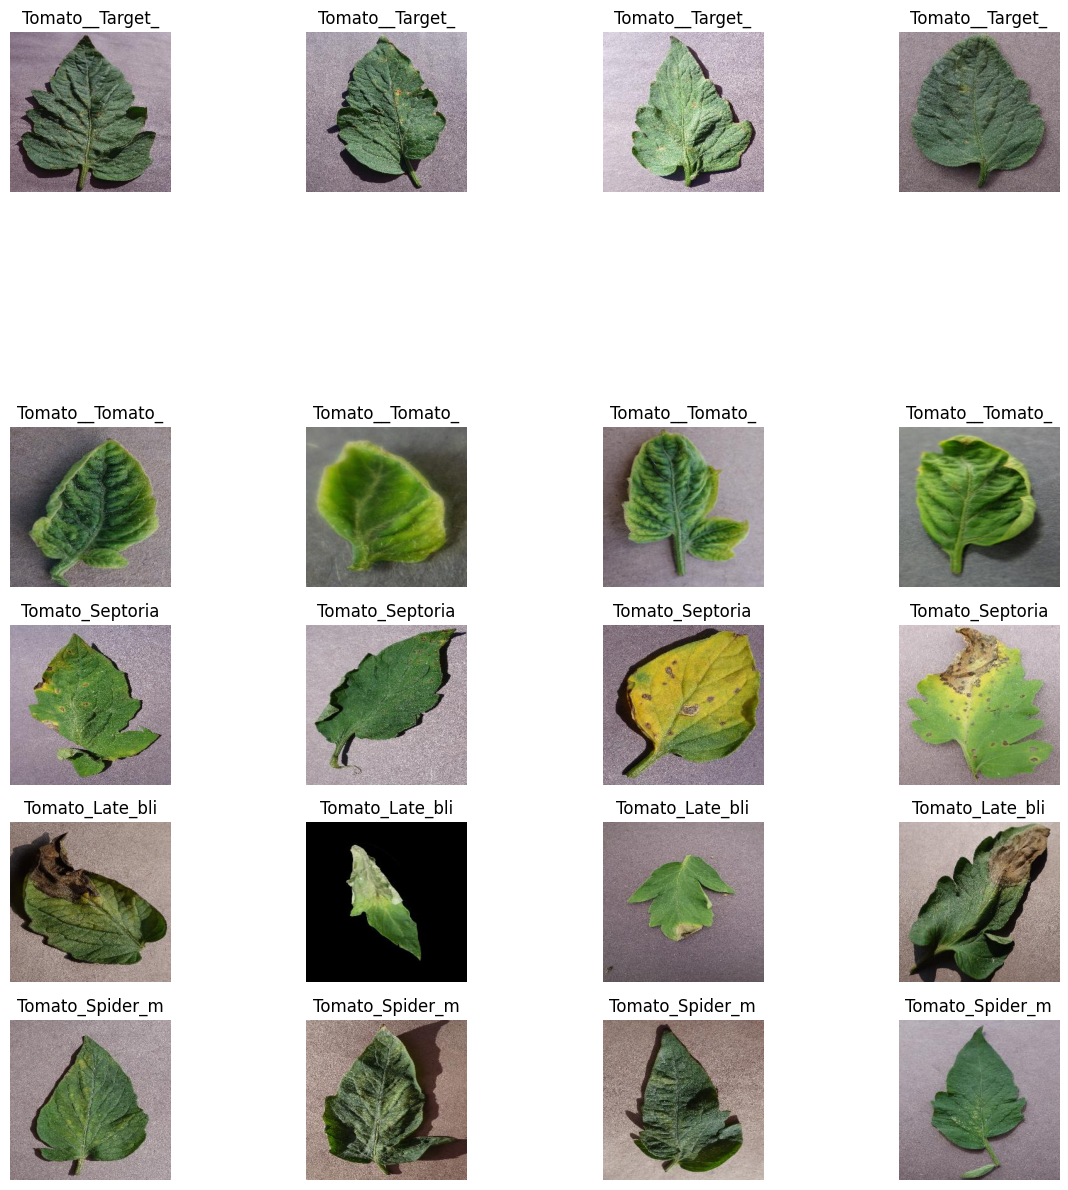

In [15]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import glob

# Définir le répertoire des données
data_dir = '/content/drive/MyDrive/PlantVillage'
plant_village_path = os.path.join(data_dir, "PlantVillage")

# Vérifier si le répertoire PlantVillage existe
if not os.path.exists(plant_village_path):
    print("⚠️ Le dossier 'PlantVillage' n'existe pas dans le chemin spécifié.")
else:
    print("✅ Dossier trouvé :", plant_village_path)

# Récupérer quelques images aléatoires et les afficher
def plot_sample_images(data_dir, num_samples=4):
    plant_village_path = os.path.join(data_dir, "PlantVillage")

    # Vérifier si le dossier existe
    if not os.path.exists(plant_village_path):
        print("⚠️ Le dossier 'PlantVillage' n'existe pas.")
        return

    # Lister les classes (sous-dossiers)
    classes = [cls for cls in os.listdir(plant_village_path) if os.path.isdir(os.path.join(plant_village_path, cls))]

    if not classes:
        print("⚠️ Aucune classe trouvée dans le dossier 'PlantVillage'.")
        return

    # Sélectionner un maximum de 6 classes aléatoirement
    selected_classes = random.sample(classes, min(6, len(classes)))

    plt.figure(figsize=(12, len(selected_classes) * 2))

    for i, cls in enumerate(selected_classes):
        class_path = os.path.join(plant_village_path, cls)

        # Récupérer uniquement les images avec les bonnes extensions
        valid_extensions = (".jpg", ".jpeg", ".png")
        images = [img for img in os.listdir(class_path) if img.lower().endswith(valid_extensions)]

        if not images:
            print(f"⚠️ Aucune image trouvée pour la classe '{cls}'.")
            continue

        # Sélectionner des images aléatoires dans la classe
        selected_images = random.sample(images, min(num_samples, len(images)))

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(class_path, img_name)

            # Vérifier si l'image existe
            if not os.path.exists(img_path):
                print(f"❌ Fichier introuvable : {img_path}")
                continue

            img = cv2.imread(img_path)

            # Vérifier si l'image est bien chargée
            if img is None:
                print(f"❌ Impossible de charger l'image : {img_path}")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir en RGB pour Matplotlib

            # Affichage
            plt.subplot(len(selected_classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(cls[:15])  # Limiter la longueur des titres pour éviter l'encombrement

    plt.tight_layout()
    plt.show()

# Afficher les images
plot_sample_images(data_dir)



In [17]:
import os
import hashlib

# Fonction pour calculer un hash unique pour chaque image
def compute_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

# Dictionnaire pour stocker les doublons
image_hashes = {}
duplicates = []

data_dir = "/content/drive/MyDrive/PlantVillage"  # Assure-toi que ce chemin est correct

# Parcourir toutes les images
for cls in os.listdir(os.path.join(data_dir, "PlantVillage")):
    class_dir = os.path.join(data_dir, "PlantVillage", cls)

    # Vérifier que c'est bien un dossier
    if not os.path.isdir(class_dir):
        continue  # Ignore les fichiers non dossiers

    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)

        # Vérifier que c'est bien un fichier image
        if not os.path.isfile(img_path):
            continue  # Ignore les dossiers et fichiers non-images

        img_hash = compute_hash(img_path)

        if img_hash in image_hashes:
            duplicates.append((img_path, image_hashes[img_hash]))
        else:
            image_hashes[img_hash] = img_path

# Affichage des doublons
if duplicates:
    print(f"🔍 {len(duplicates)} images en double trouvées !")
    for dup1, dup2 in duplicates[:10]:  # Afficher 10 exemples max
        print(f"Doublon : {dup1} <--> {dup2}")
else:
    print("✅ Aucun doublon détecté.")


🔍 166 images en double trouvées !
Doublon : /content/drive/MyDrive/PlantVillage/PlantVillage/Tomato__Tomato_mosaic_virus/91247151-4bae-4d55-a35c-edb9318bdb09___PSU_CG 2139.JPG <--> /content/drive/MyDrive/PlantVillage/PlantVillage/Tomato__Tomato_mosaic_virus/91247151-4bae-4d55-a35c-edb9318bdb09___PSU_CG 2139 (1).JPG
Doublon : /content/drive/MyDrive/PlantVillage/PlantVillage/Tomato__Tomato_mosaic_virus/9492201b-e31b-463f-9ffc-1669b8afc908___PSU_CG 2409.JPG <--> /content/drive/MyDrive/PlantVillage/PlantVillage/Tomato__Tomato_mosaic_virus/9492201b-e31b-463f-9ffc-1669b8afc908___PSU_CG 2409 (1).JPG
Doublon : /content/drive/MyDrive/PlantVillage/PlantVillage/Tomato__Tomato_mosaic_virus/9155ae3a-ecb2-4744-b60b-60f96f4e3ba8___PSU_CG 2191.JPG <--> /content/drive/MyDrive/PlantVillage/PlantVillage/Tomato__Tomato_mosaic_virus/9155ae3a-ecb2-4744-b60b-60f96f4e3ba8___PSU_CG 2191 (1).JPG
Doublon : /content/drive/MyDrive/PlantVillage/PlantVillage/Tomato__Tomato_mosaic_virus/8e59061b-3802-4297-8724-a001ef

In [19]:
pip install tabulate


In [21]:
import os
from tabulate import tabulate
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/PlantVillage"  # Assure-toi que ce chemin est correct

# Parcourir toutes les classes et compter les images
image_counts = {}

for cls in os.listdir(os.path.join(data_dir, "PlantVillage")):
    class_dir = os.path.join(data_dir, "PlantVillage", cls)

    # Vérifier que c'est bien un dossier
    if not os.path.isdir(class_dir):
        continue  # Ignore les fichiers non dossiers

    # Compter les images dans le dossier de la classe
    image_count = 0
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)

        # Vérifier que c'est bien un fichier image (vérification de l'extension)
        if os.path.isfile(img_path) and img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_count += 1

    image_counts[cls] = image_count

# Affichage du nombre d'images sous forme de tableau
table = [(cls, count) for cls, count in image_counts.items()]
headers = ["Class", "Number of Images"]
print("\n📝 Image Counts per Class:")
print(tabulate(table, headers, tablefmt="pretty"))

# Affichage sous forme de graphique à barres
classes = list(image_counts.keys())
counts = list(image_counts.values())






📝 Image Counts per Class:
+---------------------------------------------+------------------+
|                    Class                    | Number of Images |
+---------------------------------------------+------------------+
|          Tomato_Septoria_leaf_spot          |       1771       |
|         Tomato__Tomato_mosaic_virus         |       382        |
|             Tomato_Late_blight              |       1915       |
|             Tomato__Target_Spot             |       1427       |
| Tomato_Spider_mites_Two_spotted_spider_mite |       1676       |
|              Tomato_Leaf_Mold               |       952        |
|               Tomato_healthy                |       1591       |
|    Tomato__Tomato_YellowLeaf__Curl_Virus    |       3221       |
|             Tomato_Early_blight             |       1000       |
|            Tomato_Bacterial_spot            |       2145       |
|            Potato___Early_blight            |       1000       |
|            Potato___Late_blight  